# 期中练习

## 要求

检验对上半学期知识的掌握，课后自行完成，可查阅各种资料。

### 如何提交

- 复制本文件，文件名改为`教学班号-编号.ipynb`。例如刘国强同学是2班第15号，文件名应改为`2-15.ipynb`。
- 在复制文件中答题，每道题的答案紧接题目。
- 答题结束后commit该文件，并提交pull request。



In [80]:
# 2021114494 黄冬阳 交通工程一班

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [83]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

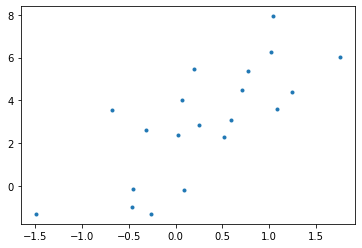

In [84]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [85]:
x_train = X[0:15]
y_train = Y[0:15]
x_test  = X[15:]
y_test  = Y[15:]

In [86]:
def regression(X, Y, n):
    rows = [X**i for i in reversed(range(n))]
    A = np.vstack(rows).T
    theta = np.linalg.solve(A.T@A, A.T@Y)
    return theta

In [87]:
def predict(theta,X):
    n = len(theta)
    degrees = reversed(range(n))

    Y = np.zeros_like(X)
    for w, d in zip(theta, degrees):
        Y += w * X**d
    return Y

### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

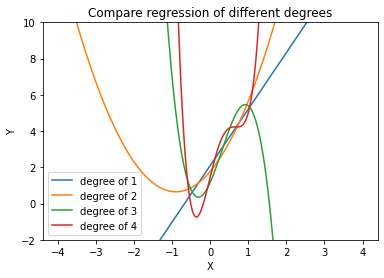

In [88]:
x_model = np.linspace(-4, 4, 200)

for i in range (2,6):
    coef1 = regression(x_train, y_train, i)
    y_model = predict(coef1, x_model)
    plt.plot(x_model, y_model, label="degree of {}".format(i-1))
plt.ylim(-2, 10)
plt.title("Compare regression of different degrees")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [89]:
Ss_test = []
Ns_test = []
Ss = []
Ns = []
for n in range(2, 6):#求出1-4次多项式拟合值与实际值的均方差
    theta = regression(x_train, y_train, n)
    Yhat = predict(theta,x_train)
    E = y_train - Yhat
    S = np.dot(E, E) / 15
    Ss.append(S)
    Ns.append(n)
print(Ss)

[3.614119980936591, 3.4709875708912987, 3.010246815533374, 2.3971661654711824]


In [90]:
for n in range(2, 6):#求出训练集所拟合的函数对测试集的拟合效果
    theta = regression(x_train, y_train, n)
    Yhat_test = predict(theta,x_test)
    E = y_test - Yhat_test
    S = np.dot(E, E) / 15
    Ss_test.append(S)
    Ns_test.append(n)

In [91]:
min_Ss_idx = Ss.index(min(Ss))
print("均方差：{}".format(Ss))
print("{}次多项式函数与训练数据拟合最好".format(min_Ss_idx+1))

均方差：[3.614119980936591, 3.4709875708912987, 3.010246815533374, 2.3971661654711824]
4次多项式函数与训练数据拟合最好


### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

1.2和1.3的答案是否相同？两者的异同有什么意义？

In [92]:
min_Ss_test_idx = Ss_test.index(min(Ss_test))
print("均方差：{}".format(Ss_test))
print("{}次多项式函数与训练数据拟合最好".format(min_Ss_test_idx+1))
print("答案不相同，使用训练集进行测试会出现过拟合现象,在训练集上，随着多项式次数的增高，均方误差逐渐减小，而在测试集上，随着多项式次数的增高，均方误差逐渐增大。当模型在训练集上表现优秀但在测试集上表现较差时，可能存在过拟合的问题，说明模型的拟合能力、泛化能力并不是随着多项式次数的增加而增加。")

均方差：[0.6457762674229708, 2.3082953054205317, 48.51276392897358, 905.8332589335402]
1次多项式函数与训练数据拟合最好
答案不相同，使用训练集进行测试会出现过拟合现象,在训练集上，随着多项式次数的增高，均方误差逐渐减小，而在测试集上，随着多项式次数的增高，均方误差逐渐增大。当模型在训练集上表现优秀但在测试集上表现较差时，可能存在过拟合的问题，说明模型的拟合能力、泛化能力并不是随着多项式次数的增加而增加。


## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

In [93]:
print("relu公式：y = max (0, x)")
print("sigmoid公式：y = 1/ (1 + e ^(-x))")
print("神经网络公式：n1=W_1*x+B_1  o1=1/(1 + e ^(-n1))  n2=W_2*o1+B_2     o2=max (0, n2)")

relu公式：y = max (0, x)
sigmoid公式：y = 1/ (1 + e ^(-x))
神经网络公式：n1=W_1*x+B_1  o1=1/(1 + e ^(-n1))  n2=W_2*o1+B_2     o2=max (0, n2)


### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [94]:
import os
import numpy as np
import torch

In [95]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [96]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [97]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [98]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [99]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [100]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [101]:
b2 = np.array([[0.277288]])

In [102]:
X = torch.tensor(X, dtype=torch.float)
Y = torch.tensor(Y, dtype=torch.float)
W1 = torch.tensor(W1, dtype=torch.float, requires_grad=True)
W2 = torch.tensor(W2, dtype=torch.float, requires_grad=True)
b1 = torch.tensor(b1, dtype=torch.float, requires_grad=True)
b2 = torch.tensor(b2, dtype=torch.float, requires_grad=True)

In [103]:
def forward(X,b1,b2,W1,W2):
    Z1 = torch.mm(X, W1) + b1
    h1 = torch.sigmoid(Z1)
    Z2 = torch.mm(h1, W2) + b2
    h2 = torch.relu(Z2)
    return h2

In [104]:
Y_pred = forward(X,b1,b2,W1,W2)
print("Y_pred:{}".format(Y_pred))
loss_fn = torch.nn.MSELoss(reduction='sum')
loss = loss_fn(Y_pred, Y)
loss1 = loss/4
print("L:{}".format(loss1))

Y_pred:tensor([[2.1851],
        [1.3508],
        [2.0997],
        [1.9834]], grad_fn=<ReluBackward0>)
L:2.806889057159424


### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

In [105]:
loss.backward()
print("W1")
print(W1.grad)
print("B1")
print(b1.grad)
print("W2")
print(W2.grad)
print("B2")
print(b2.grad)

W1
tensor([[-0.4025, -0.0018,  0.0491, -0.5155, -0.1874],
        [ 0.6442, -0.0111,  0.8137,  0.2788,  0.5732]])
B1
tensor([ 1.8136, -0.0273,  2.1717,  1.4389,  2.1092])
W2
tensor([[4.8222],
        [5.3407],
        [2.6462],
        [9.7043],
        [4.2573]])
B2
tensor([[11.7448]])
